# Electric Vehicle Charging Station Energy Consumption Prediction

In [9]:
import pandas as pd
import seaborn as sns
from matplotlib.cm import viridis
import matplotlib.pyplot as plt

## Data Cleaning

In [13]:
data = pd.read_csv('../data/station_data.csv')

In [14]:
data.head()

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sessionId       3395 non-null   int64  
 1   kwhTotal        3395 non-null   float64
 2   dollars         3395 non-null   float64
 3   created         3395 non-null   object 
 4   ended           3395 non-null   object 
 5   startTime       3395 non-null   int64  
 6   endTime         3395 non-null   int64  
 7   chargeTimeHrs   3395 non-null   float64
 8   weekday         3395 non-null   object 
 9   platform        3395 non-null   object 
 10  distance        2330 non-null   float64
 11  userId          3395 non-null   int64  
 12  stationId       3395 non-null   int64  
 13  locationId      3395 non-null   int64  
 14  managerVehicle  3395 non-null   int64  
 15  facilityType    3395 non-null   int64  
 16  Mon             3395 non-null   int64  
 17  Tues            3395 non-null   i

In [11]:
def remove_leading_zeros_and_convert(dates):
    corrected_dates = []
    for date in dates:
        if date.startswith('00'):
            corrected_date = date.lstrip('0')  # Remove leading zeros from the year
            corrected_dates.append(pd.to_datetime(corrected_date, errors='coerce'))
        else:
            corrected_dates.append(pd.to_datetime(date, errors='coerce'))
    return corrected_dates

In [14]:
formatted_dates_created = remove_leading_zeros_and_convert(data.created)
formatted_dates_ended = remove_leading_zeros_and_convert(data.ended)

In [15]:
data['created'] = formatted_dates_created
data['ended'] = formatted_dates_ended

In [41]:
data.head()

,kwhTotal,startTime,endTime,chargeTimeHrs,weekday,facilityType,created_hour,created_day,created_month,session_duration,kwh_per_hour,startPeriod,endPeriod
0,7.78,15,17,1.510556,Tue,3,15,2,11,1.510556,5.150423,Afternoon,Afternoon
1,9.74,17,19,2.177222,Wed,3,17,3,11,2.177222,4.473590,Afternoon,Evening
2,6.76,12,16,4.671667,Fri,3,12,6,11,4.671667,1.447021,Afternoon,Afternoon
3,6.17,19,21,1.768333,Wed,3,19,6,12,1.768333,3.489161,Evening,Evening
4,0.93,20,21,0.298611,Thu,3,20,2,12,0.298611,3.114419,Evening,Evening


In [44]:
data[data['startTime'] > data['endTime']]

,kwhTotal,startTime,endTime,chargeTimeHrs,weekday,facilityType,created_hour,created_day,created_month,session_duration,kwh_per_hour,startPeriod,endPeriod
173,4.10,18,1,5.695000,Mon,4,18,3,1,26287.238056,0.719930,Evening,Night
924,10.55,22,1,2.701667,Fri,4,22,1,5,8738.701667,3.904997,Evening,Night
952,10.55,23,2,2.682778,Sat,1,23,5,8,8762.682778,3.932491,Evening,Night
1909,10.55,16,1,5.695000,Thu,3,16,2,7,8744.710833,1.852502,Afternoon,Night
1912,10.55,22,1,2.766389,Wed,3,22,4,7,8738.766389,3.813636,Evening,Night
1915,6.88,20,0,4.297222,Mon,3,20,3,7,8764.297222,1.601034,Evening,Night
1917,10.55,22,0,2.558889,Wed,3,22,6,7,8738.558889,4.122883,Evening,Night
1922,10.55,21,1,3.534722,Wed,3,21,0,8,8739.534722,2.984676,Evening,Night
1934,10.55,17,0,5.695000,Fri,3,17,6,8,8742.905833,1.852502,Afternoon,Night
1935,7.02,20,0,3.934722,Mon,3,20,4,8,-262244.065278,1.784116,Evening,Night


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sessionId       3395 non-null   int64         
 1   kwhTotal        3395 non-null   float64       
 2   dollars         3395 non-null   float64       
 3   created         3395 non-null   datetime64[ns]
 4   ended           3395 non-null   datetime64[ns]
 5   startTime       3395 non-null   int64         
 6   endTime         3395 non-null   int64         
 7   chargeTimeHrs   3395 non-null   float64       
 8   weekday         3395 non-null   object        
 9   platform        3395 non-null   object        
 10  distance        2330 non-null   float64       
 11  userId          3395 non-null   int64         
 12  stationId       3395 non-null   int64         
 13  locationId      3395 non-null   int64         
 14  managerVehicle  3395 non-null   int64         
 15  faci

In [22]:
data.isnull().sum()

sessionId            0
kwhTotal             0
dollars              0
created              0
ended                0
startTime            0
endTime              0
chargeTimeHrs        0
weekday              0
platform             0
distance          1065
userId               0
stationId            0
locationId           0
managerVehicle       0
facilityType         0
Mon                  0
Tues                 0
Wed                  0
Thurs                0
Fri                  0
Sat                  0
Sun                  0
reportedZip          0
dtype: int64

# Date and Time Analysis

In [16]:
# Convert to pandas datetime
data['created'] = pd.to_datetime(data['created'])
data['ended'] = pd.to_datetime(data['ended'])

# Extract additional date-time features
data['created_hour'] = data['created'].dt.hour
data['created_day'] = data['created'].dt.dayofweek
data['created_month'] = data['created'].dt.month

# Check the new columns
data[['created', 'created_hour', 'created_day', 'created_month']].head()

,created,created_hour,created_day,created_month
0,2018-11-14 15:40:26,15,2,11
1,2019-11-14 17:40:26,17,3,11
2,2021-11-14 12:05:46,12,6,11
3,2003-12-14 19:16:12,19,6,12
4,2011-12-14 20:56:11,20,2,12


# Univariate Analysis

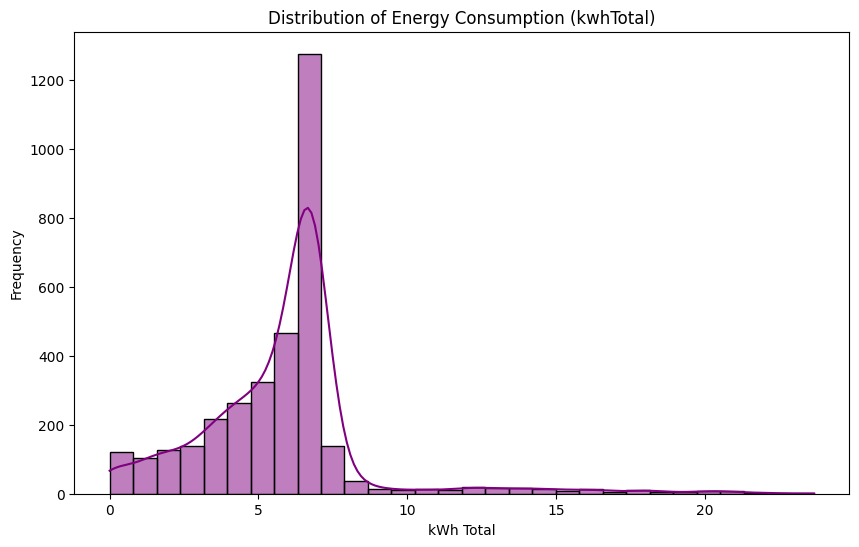

In [19]:
# Plot histogram of energy consumption (kwhTotal)
plt.figure(figsize=(10, 6))
sns.histplot(data['kwhTotal'], kde=True, color='purple', bins=30)
plt.title('Distribution of Energy Consumption (kwhTotal)')
plt.xlabel('kWh Total')
plt.ylabel('Frequency')
plt.show()

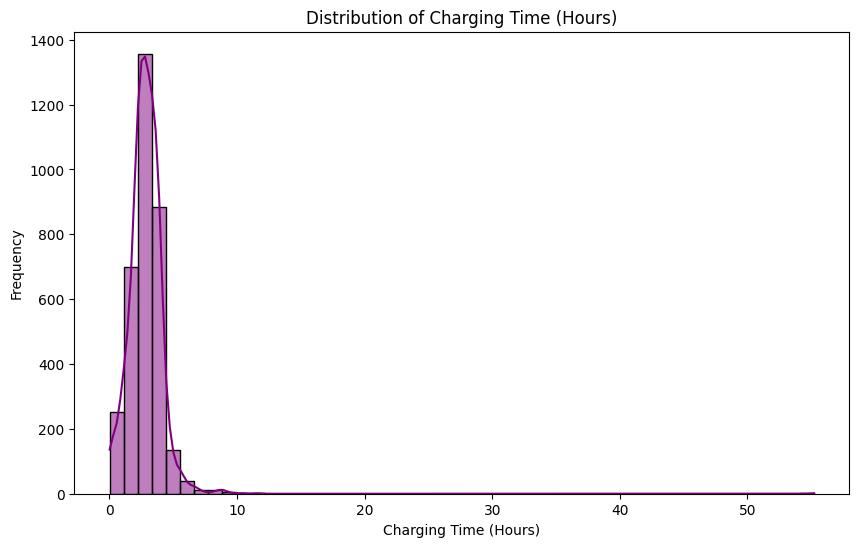

In [18]:
# Plot histogram of charging time (chargeTimeHrs)
plt.figure(figsize=(10, 6))
sns.histplot(data['chargeTimeHrs'], kde=True, color='purple', bins=50)
plt.title('Distribution of Charging Time (Hours)')
plt.xlabel('Charging Time (Hours)')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis

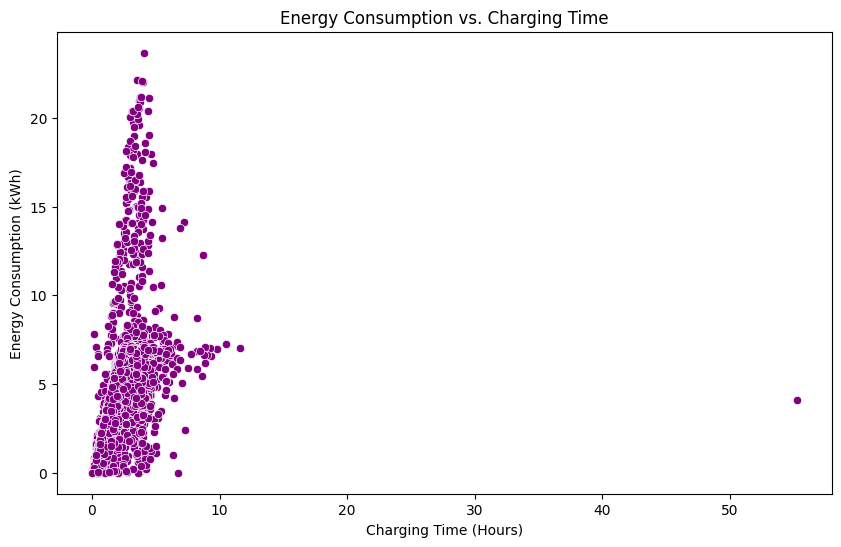

In [35]:
# Scatter plot of kWh vs Charging Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='chargeTimeHrs', y='kwhTotal', data=data, color='purple')
plt.title('Energy Consumption vs. Charging Time')
plt.xlabel('Charging Time (Hours)')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

Note:- found outliers

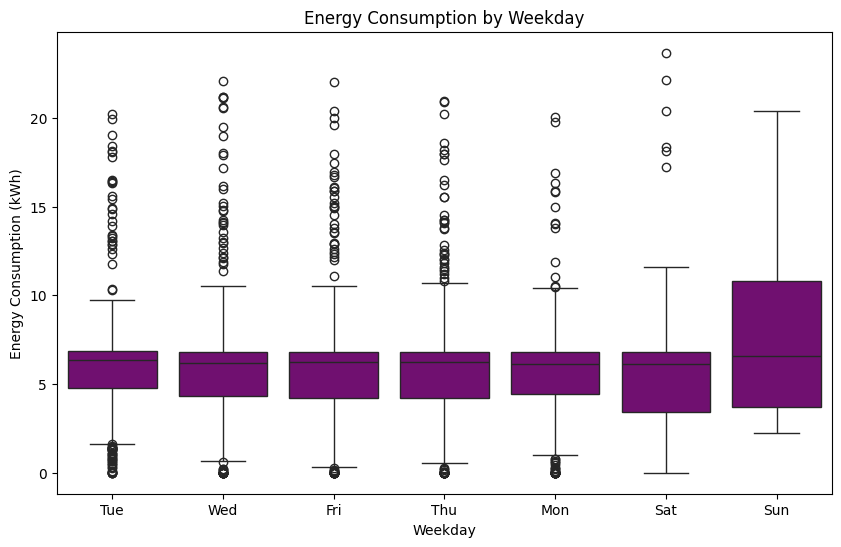

In [70]:
# Boxplot of energy consumption by weekday
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='kwhTotal', data=data, color='purple')
plt.title('Energy Consumption by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

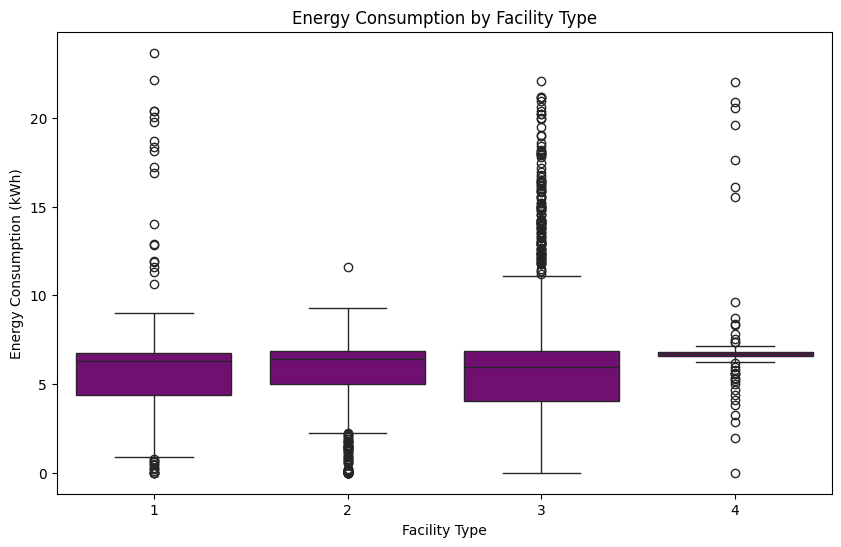

In [71]:
# Boxplot of energy consumption by facility type
plt.figure(figsize=(10, 6))
sns.boxplot(x='facilityType', y='kwhTotal', data=data, color='purple')
plt.title('Energy Consumption by Facility Type')
plt.xlabel('Facility Type')
plt.ylabel('Energy Consumption (kWh)')
plt.show()


# Multivariate Analysis

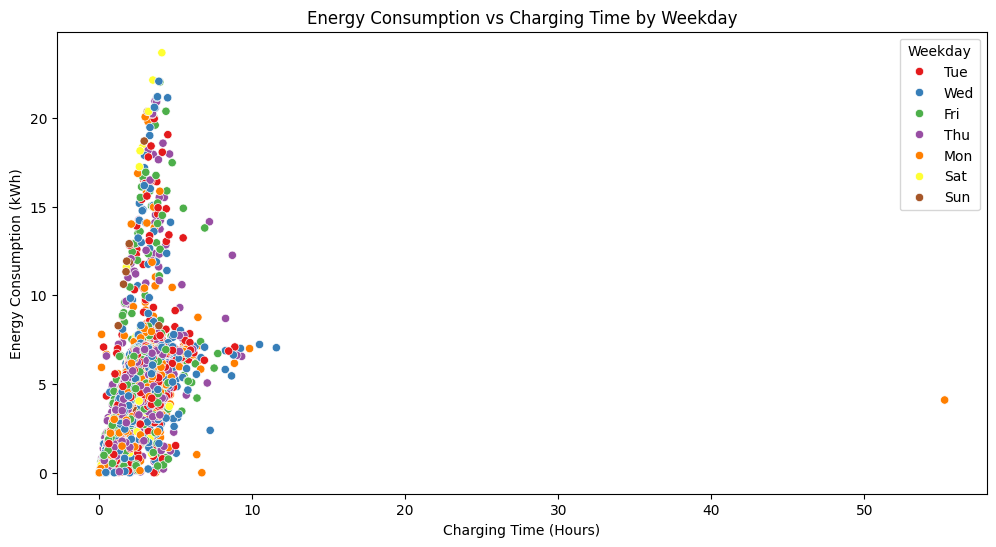

In [72]:
# Plotting energy consumption vs weekday and charging time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='chargeTimeHrs', y='kwhTotal', hue='weekday', data=data, palette='Set1')
plt.title('Energy Consumption vs Charging Time by Weekday')
plt.xlabel('Charging Time (Hours)')
plt.ylabel('Energy Consumption (kWh)')
plt.legend(title='Weekday')
plt.show()

# Outlier Detection

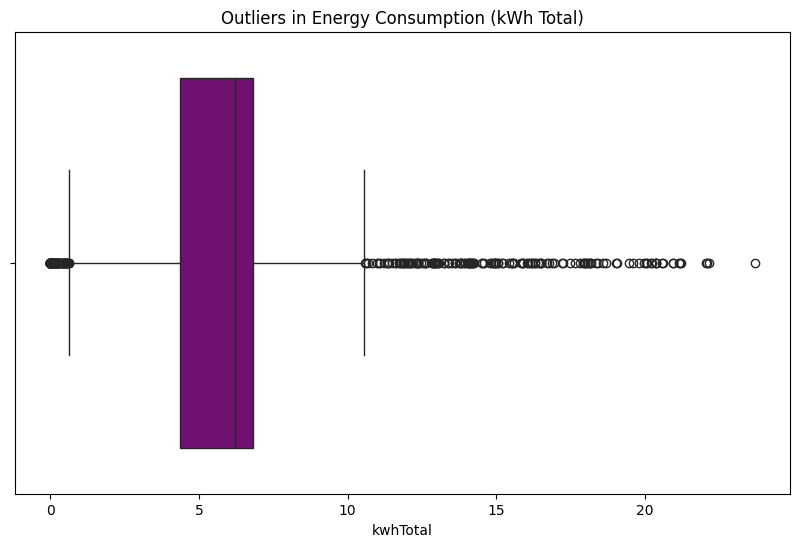

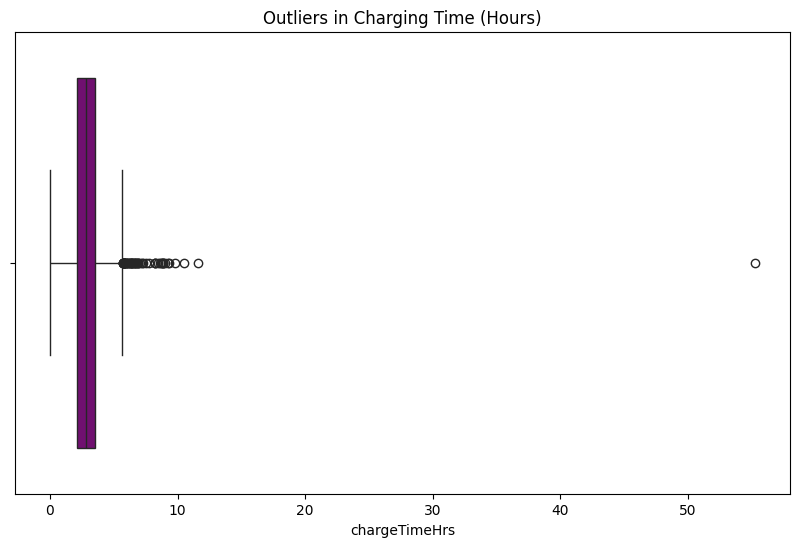

In [73]:
# Boxplot to detect outliers in kWh
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['kwhTotal'], color='purple')
plt.title('Outliers in Energy Consumption (kWh Total)')
plt.show()

# Boxplot to detect outliers in charging time
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['chargeTimeHrs'], color='purple')
plt.title('Outliers in Charging Time (Hours)')
plt.show()

In [20]:
def fix_and_cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Apply capping without filtering
    df.loc[:, column] = df[column].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )
    return df

In [21]:
# Apply for both columns
df_cleaned = fix_and_cap_outliers(data, 'kwhTotal')
df_cleaned = fix_and_cap_outliers(df_cleaned, 'chargeTimeHrs')

print('Original data shape:', data.shape)
print('Cleaned data shape:', df_cleaned.shape)

Original data shape: (3395, 27)
Cleaned data shape: (3395, 27)


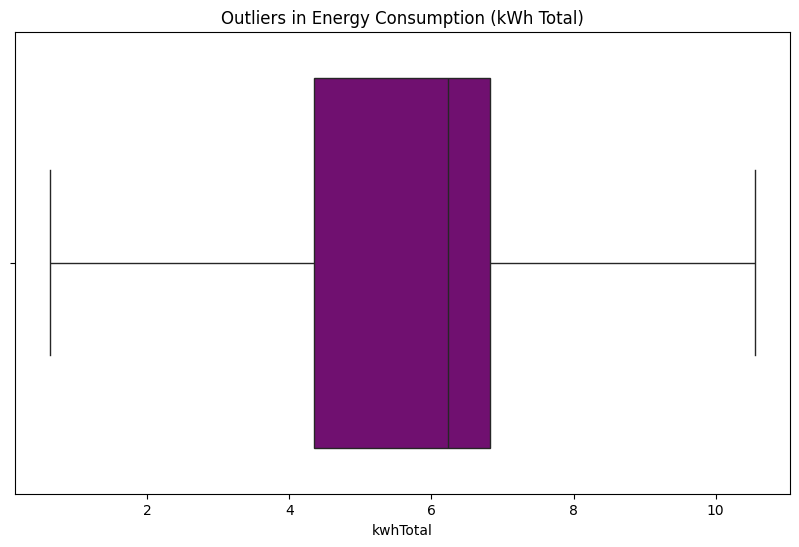

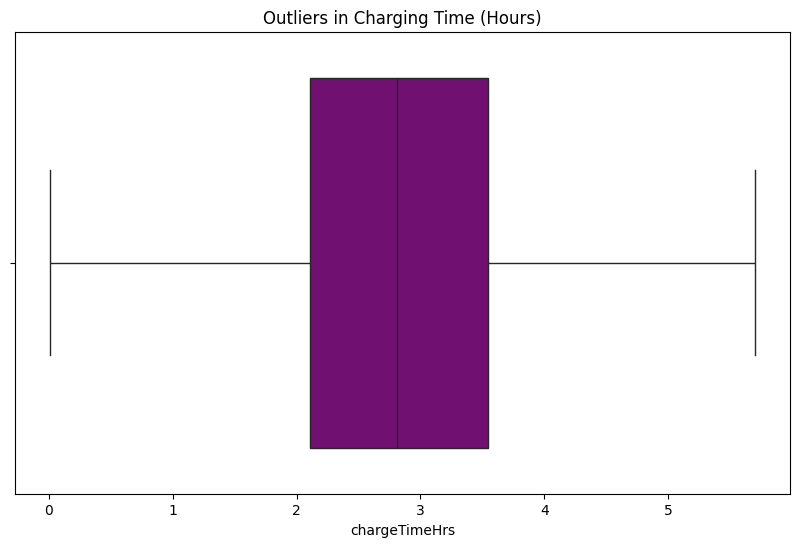

In [22]:
# Boxplot after fixing outliers in kWh
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['kwhTotal'], color='purple')
plt.title('Outliers in Energy Consumption (kWh Total)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['chargeTimeHrs'], color='purple')
plt.title('Outliers in Charging Time (Hours)')
plt.show()

# Categorical Variable Analysis

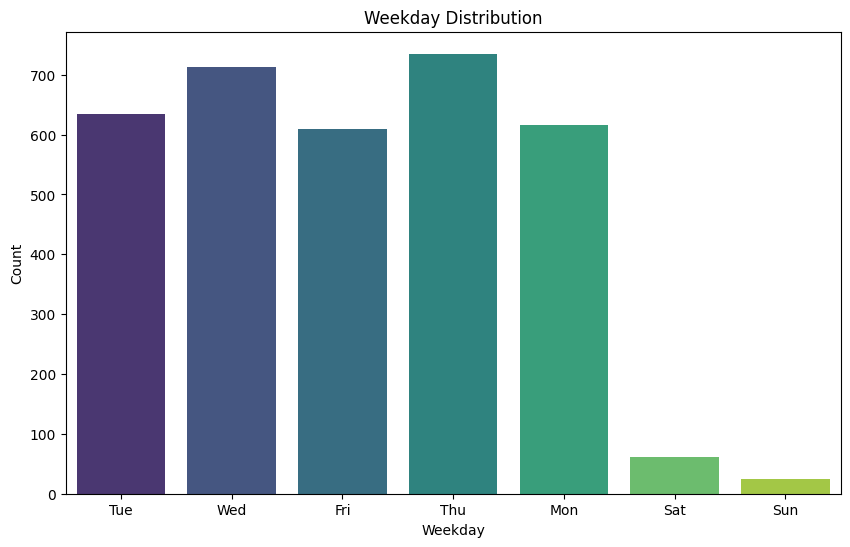

In [122]:
# Count plot for weekdays
plt.figure(figsize=(10, 6))
sns.countplot(x='weekday', data=df_cleaned, palette='viridis', hue='weekday')
plt.title('Weekday Distribution')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()

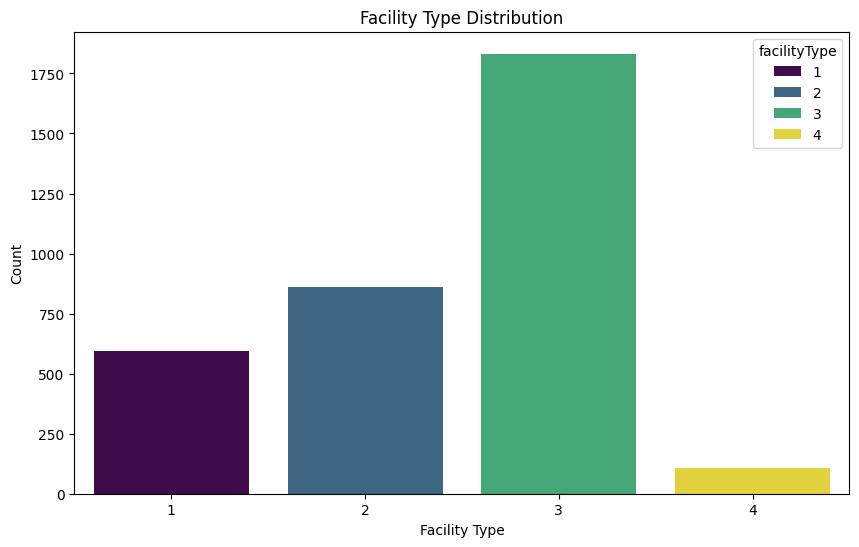

In [125]:
# Count plot for facility type
plt.figure(figsize=(10, 6))
sns.countplot(x='facilityType', data=df_cleaned, palette='viridis', hue='facilityType')
plt.title('Facility Type Distribution')
plt.xlabel('Facility Type')
plt.ylabel('Count')
plt.show()

## Feature Engineering

In [23]:
# Create total session time
df_cleaned['session_duration'] = (df_cleaned['ended'] - df_cleaned['created']).dt.total_seconds() / 3600  # in hours

# Create energy consumption per hour
df_cleaned['kwh_per_hour'] = df_cleaned['kwhTotal'] / df_cleaned['chargeTimeHrs']


In [24]:
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df_cleaned['startPeriod'] = df_cleaned['startTime'].apply(categorize_time)
df_cleaned['endPeriod'] = df_cleaned['endTime'].apply(categorize_time)

In [25]:
df_cleaned.head()

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,Sat,Sun,reportedZip,created_hour,created_day,created_month,session_duration,kwh_per_hour,startPeriod,endPeriod
0,1366563,7.78,0.00,2018-11-14 15:40:26,2018-11-14 17:11:04,15,17,1.510556,Tue,android,...,0,0,0,15,2,11,1.510556,5.150423,Afternoon,Afternoon
1,3075723,9.74,0.00,2019-11-14 17:40:26,2019-11-14 19:51:04,17,19,2.177222,Wed,android,...,0,0,0,17,3,11,2.177222,4.473590,Afternoon,Evening
2,4228788,6.76,0.58,2021-11-14 12:05:46,2021-11-14 16:46:04,12,16,4.671667,Fri,android,...,0,0,0,12,6,11,4.671667,1.447021,Afternoon,Afternoon
3,3173284,6.17,0.00,2003-12-14 19:16:12,2003-12-14 21:02:18,19,21,1.768333,Wed,android,...,0,0,0,19,6,12,1.768333,3.489161,Evening,Evening
4,3266500,0.93,0.00,2011-12-14 20:56:11,2011-12-14 21:14:06,20,21,0.298611,Thu,android,...,0,0,0,20,2,12,0.298611,3.114419,Evening,Evening


In [135]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   kwhTotal          3395 non-null   float64
 1   dollars           3395 non-null   float64
 2   startTime         3395 non-null   int64  
 3   endTime           3395 non-null   int64  
 4   chargeTimeHrs     3395 non-null   float64
 5   weekday           3395 non-null   object 
 6   platform          3395 non-null   object 
 7   distance          3395 non-null   float64
 8   facilityType      3395 non-null   int64  
 9   created_hour      3395 non-null   int32  
 10  created_day       3395 non-null   int32  
 11  created_month     3395 non-null   int32  
 12  session_duration  3395 non-null   float64
 13  kwh_per_hour      3395 non-null   float64
 14  startPeriod       3395 non-null   object 
 15  endPeriod         3395 non-null   object 
dtypes: float64(6), int32(3), int64(3), object(

In [26]:
# Drop columns that are redundant or not useful for the model
columns_to_drop = ['sessionId', 'userId', 'stationId', 'locationId', 'managerVehicle', 'platform', 'dollars', 'distance',
                  'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'reportedZip', 'created', 'ended']
df_cleaned.drop(columns=columns_to_drop, inplace=True)


In [30]:
# # Encode categorical features (e.g., weekday, startPeriod, endPeriod)
df_cleaned = pd.get_dummies(df_cleaned, columns=['weekday', 'startPeriod', 'endPeriod'], drop_first=True)

In [31]:
# Convert the new columns to int type
df_cleaned = df_cleaned.astype({'weekday_Mon': 'int', 'weekday_Tue': 'int', 'weekday_Wed': 'int', 
                                'weekday_Thu': 'int', 'weekday_Sat': 'int', 'weekday_Sun': 'int',
                                'startPeriod_Evening': 'int', 'startPeriod_Night': 'int',
                                 'endPeriod_Night': 'int', 'startPeriod_Morning': 'int',
                                'endPeriod_Evening': 'int', 'endPeriod_Morning': 'int'})

In [32]:
# Scale the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_cleaned[['session_duration', 'kwh_per_hour']] = scaler.fit_transform(df_cleaned[['session_duration', 'kwh_per_hour']])

In [34]:
import pickle

pickle.dump(scaler, open('../scalers/scaler.pkl', 'wb'))

In [35]:
# Check the cleaned data
df_cleaned.head()

,kwhTotal,startTime,endTime,chargeTimeHrs,facilityType,created_hour,created_day,created_month,session_duration,kwh_per_hour,...,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,startPeriod_Evening,startPeriod_Morning,startPeriod_Night,endPeriod_Evening,endPeriod_Morning,endPeriod_Night
0,7.78,15,17,1.510556,3,15,2,11,0.024789,0.698579,...,0,0,1,0,0,0,0,0,0,0
1,9.74,17,19,2.177222,3,17,3,11,0.024875,0.512652,...,0,0,0,1,0,0,0,1,0,0
2,6.76,12,16,4.671667,3,12,6,11,0.025197,-0.318753,...,0,0,0,0,0,0,0,0,0,0
3,6.17,19,21,1.768333,3,19,6,12,0.024822,0.242227,...,0,0,0,1,1,0,0,1,0,0
4,0.93,20,21,0.298611,3,20,2,12,0.024632,0.139285,...,0,1,0,0,1,0,0,1,0,0


In [36]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   kwhTotal             3395 non-null   float64
 1   startTime            3395 non-null   int64  
 2   endTime              3395 non-null   int64  
 3   chargeTimeHrs        3395 non-null   float64
 4   facilityType         3395 non-null   int64  
 5   created_hour         3395 non-null   int32  
 6   created_day          3395 non-null   int32  
 7   created_month        3395 non-null   int32  
 8   session_duration     3395 non-null   float64
 9   kwh_per_hour         3395 non-null   float64
 10  weekday_Mon          3395 non-null   int64  
 11  weekday_Sat          3395 non-null   int64  
 12  weekday_Sun          3395 non-null   int64  
 13  weekday_Thu          3395 non-null   int64  
 14  weekday_Tue          3395 non-null   int64  
 15  weekday_Wed          3395 non-null   i

In [38]:
df_cleaned.to_csv('../data/cleaned_station_data.csv', index=False)

## Making data ready for training

In [210]:
# Importing Dependencies
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

# Importing Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [211]:
df = pd.read_csv('./data/cleaned_station_data.csv')

In [212]:
df.head()

,kwhTotal,startTime,endTime,chargeTimeHrs,facilityType,created_hour,created_day,created_month,session_duration,kwh_per_hour,...,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,startPeriod_Evening,startPeriod_Morning,startPeriod_Night,endPeriod_Evening,endPeriod_Morning,endPeriod_Night
0,7.78,15,17,1.510556,3,15,2,11,0.024789,0.698579,...,0,0,1,0,0,0,0,0,0,0
1,9.74,17,19,2.177222,3,17,3,11,0.024875,0.512652,...,0,0,0,1,0,0,0,1,0,0
2,6.76,12,16,4.671667,3,12,6,11,0.025197,-0.318753,...,0,0,0,0,0,0,0,0,0,0
3,6.17,19,21,1.768333,3,19,6,12,0.024822,0.242227,...,0,0,0,1,1,0,0,1,0,0
4,0.93,20,21,0.298611,3,20,2,12,0.024632,0.139285,...,0,1,0,0,1,0,0,1,0,0


In [213]:
X = df.drop(columns=['kwhTotal']).values
y = df['kwhTotal'].values

Performing cross_val_test on default parameters to choose best perfoming models

In [214]:
models = [LinearRegression(), RandomForestRegressor(), KNeighborsRegressor(), SVR(), XGBRegressor()]

In [215]:
scoring_metrics = make_scorer(mean_squared_error, greater_is_better=False)

def model_cross_val_test(models, X, y, cv=5):
    for model in models:
        cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring_metrics)
        mse_scores = [-score for score in cv_scores]
        print(f'CV MSE Scores for {model.__class__.__name__}: {mse_scores}')
        print(f'Mean MSE for {model.__class__.__name__}: {round(sum(mse_scores) / len(mse_scores), 2)}\n')

In [216]:
model_cross_val_test(models, X, y, cv=5)

CV MSE Scores for LinearRegression: [5.337301947967981, 3.8267359156732104, 4.331329084721871, 2.6548932195211763, 2.2359353776121096]
Mean MSE for LinearRegression: 3.68

CV MSE Scores for RandomForestRegressor: [0.12320471617083996, 0.07072415219440419, 0.07039588516936647, 0.08146414589101614, 0.06845366933726078]
Mean MSE for RandomForestRegressor: 0.08

CV MSE Scores for KNeighborsRegressor: [5.004419516936672, 3.9272579970544923, 3.9129967776141386, 2.6164057142857144, 2.5033313696612667]
Mean MSE for KNeighborsRegressor: 3.59

CV MSE Scores for SVR: [5.119047005609893, 3.730834060580787, 4.459094908309377, 2.7033971990302827, 2.165875990816273]
Mean MSE for SVR: 3.64

CV MSE Scores for XGBRegressor: [0.1481547331139648, 0.18710254819589323, 0.03971291535447786, 0.05750160826782825, 0.07369619415265523]
Mean MSE for XGBRegressor: 0.1



Inference:- `RandomForestRegressor` and `XGBRegressor` both have excellent results with near-zero errors.

In [217]:
final_models = [RandomForestRegressor(), XGBRegressor()]

In [218]:
hyperparameters_grid = {
    'rf': {
        'n_estimators': [10, 50, 100, 200, 500],  
        'max_depth': [1, 2, 3, 4, 8, 16, 32, 64, None], 
        'min_samples_split': [2, 10, 30, 50, 100],
    },

    'xgb': {
        'n_estimators': [10, 50, 100, 200, 500],  
        'learning_rate': [0.001, 0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
    }

}

In [219]:
def model_grid_search_cv_test(X, y, models, hyperparameters_grid, cv=5):
    result = []
    hyperparameter_keys = list(hyperparameters_grid.keys())
    for i, model in enumerate(models):
        key = hyperparameter_keys[i]
        param = hyperparameters_grid[key]
        classifier = GridSearchCV(model, param, cv=cv, verbose=2, scoring='r2')
        classifier.fit(X, y)

        result.append({
            'model_name': model.__class__.__name__,
            'best_model': classifier.best_estimator_,
            'best_score': classifier.best_score_,
            'best_params': classifier.best_params_
        })

        print(f'Done: {i+1}')

    best_result_df = pd.DataFrame(result)
    return best_result_df

In [220]:
result = model_grid_search_cv_test(X, y, final_models, hyperparameters_grid, cv=5)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END .max_depth=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END .max_depth=1, min_samples_split=2, n

In [221]:
result

,model_name,best_model,best_score,best_params
0,RandomForestRegressor,"(DecisionTreeRegressor(max_depth=32, max_featu...",0.981770,"{'max_depth': 32, 'min_samples_split': 2, 'n_e..."
1,XGBRegressor,"XGBRegressor(base_score=None, booster=None, ca...",0.988027,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."


RF_Params:- `{'max_depth': 32, 'min_samples_split': 2, 'n_estimators': 50}` : `Score = 98.2%`

XGB_Params:- `{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}` : `Score = 99.0%`

In [227]:
best_rf = result.iloc[0].best_model
best_xgb = result.iloc[1].best_model

best_models = [best_rf, best_xgb]

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [229]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(2716, 21)
(2716,)
(679, 21)
(679,)


In [230]:
def fit_and_predict(model, X_train, X_test, y_train, y_test):
    print(f'Regression Report of: {model}\n')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R-squared (R2): {r2}')
    print('_'*100, '\n')

In [231]:
for model in best_models:
    fit_and_predict(model, X_train, X_test, y_train, y_test)

Regression Report of: RandomForestRegressor(max_depth=32, n_estimators=50)

Mean Absolute Error (MAE): 0.0902786450662739
Mean Squared Error (MSE): 0.06940411569955816
R-squared (R2): 0.9850468257913153
____________________________________________________________________________________________________ 

Regression Report of: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jo

Inference:- `XGBRegressor` is performing best

    - Mean Absolute Error (MAE):  0.08496715753524399
    - Mean Squared Error (MSE): 0.033143338982671515
    - R-squared (R2): 0.9928592401665233
___________________________________

In [232]:
import pickle
pickle.dump(best_xgb, open('../models/xgb_model.pkl', 'wb'))

In [4]:
import pickle
model = pickle.load(open('../models/xgb_model.pkl', 'rb'))

In [6]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred[:10])
print(y_test[:10])

In [39]:
df_cleaned['facilityType'].value_counts()

facilityType
3    1832
2     862
1     593
4     108
Name: count, dtype: int64